# Using Machine Learning to Predict Annual Income Based on USA Census Data

This project uses the annual income data set from the US census to predict annual money incomes for adults, given a set of 41 employment and demographic attributes. Census money income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains) before payments for personal income taxes, social security, union dues, Medicare deductions.

Income levels were binned into two classes, 1) greater than 50,000 and 2) less than or equal to 50,000 (annually) in the dataset. Therefore, the analysis and modeling was based on this classification.

The project uses Machine Learning, Python, Data Modelling, and Tableau 10.0 for visualization.


# Importing Libraries and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
# US Income data set path
income_path = "Resources/income.csv"

# Import the data into a Pandas DataFrame
df = pd.read_csv(income_path)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:

columns = ['Age',
           'Employer_Type',
           'fnlgwt',
           'Education',
           'Ed_Numeric',
           'Marital_Status',
           'Occupation',
           'Relationship',
           'Race',
           'Sex',
           'Capital_Gain',
           'Capital_Loss',
           'Hours_per_Week',
           'Country',
           'Income_Above_Below_50K']
df=pd.read_csv(income_path, names=columns)
df.head(10)

,Age,Employer_Type,fnlgwt,Education,Ed_Numeric,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income_Above_Below_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Print Schematic representation of Data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                       32561 non-null int64
Employer_Type             32561 non-null object
fnlgwt                    32561 non-null int64
Education                 32561 non-null object
Ed_Numeric                32561 non-null int64
Marital_Status            32561 non-null object
Occupation                32561 non-null object
Relationship              32561 non-null object
Race                      32561 non-null object
Sex                       32561 non-null object
Capital_Gain              32561 non-null int64
Capital_Loss              32561 non-null int64
Hours_per_Week            32561 non-null int64
Country                   32561 non-null object
Income_Above_Below_50K    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis and Data Wrangling

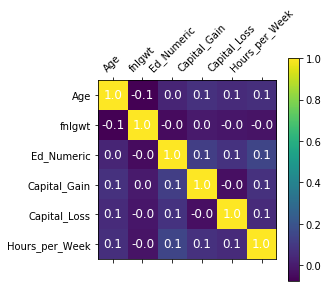

In [5]:
#correlation matrix
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=12)
    

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence,drop the column later.

In [6]:
# Check for null values
print ("\nNull Values :  ", df.isnull().sum().values.sum())


Null Values :   0


In [7]:
# Check for " ?" values
df_missing = (df==' ?').sum()
df_missing

Age                          0
Employer_Type             1836
fnlgwt                       0
Education                    0
Ed_Numeric                   0
Marital_Status               0
Occupation                1843
Relationship                 0
Race                         0
Sex                          0
Capital_Gain                 0
Capital_Loss                 0
Hours_per_Week               0
Country                    583
Income_Above_Below_50K       0
dtype: int64

In [8]:
# Remove rows which have invalid data from data frame
df = df[(df.astype(str) != ' ?').all(axis=1)]

# Make sure that the rows were dropped. There were 32561 rows before.
len(df)

30162

In [9]:
# Create a new column for income which is binary
df['Income_Above/Below_50K'] = df.apply(lambda row: 
                                        1 if '>50K' in row['Income_Above_Below_50K'] 
                                        else 0, axis=1)

In [10]:
# Remove unwanted columns
df = df.drop(['Income_Above_Below_50K',
              'fnlgwt',
              'Ed_Numeric',
              'Capital_Gain',
              'Capital_Loss','Country'], axis=1)
df.head(10)

,Age,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Income_Above/Below_50K
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,1


## Marital Status

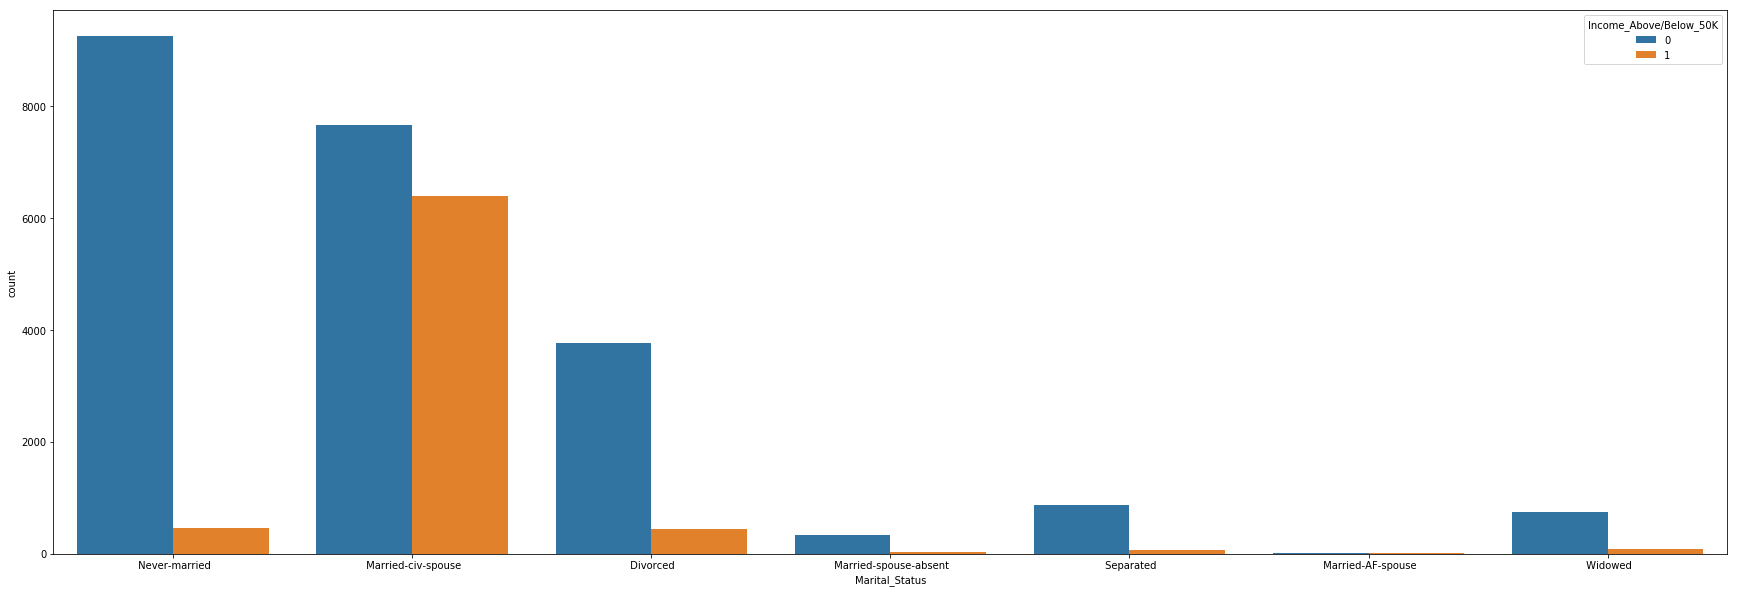

In [11]:

df['Marital_Status'].value_counts()
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = 'Marital_Status', hue = 'Income_Above/Below_50K', data = df)

## Occupation

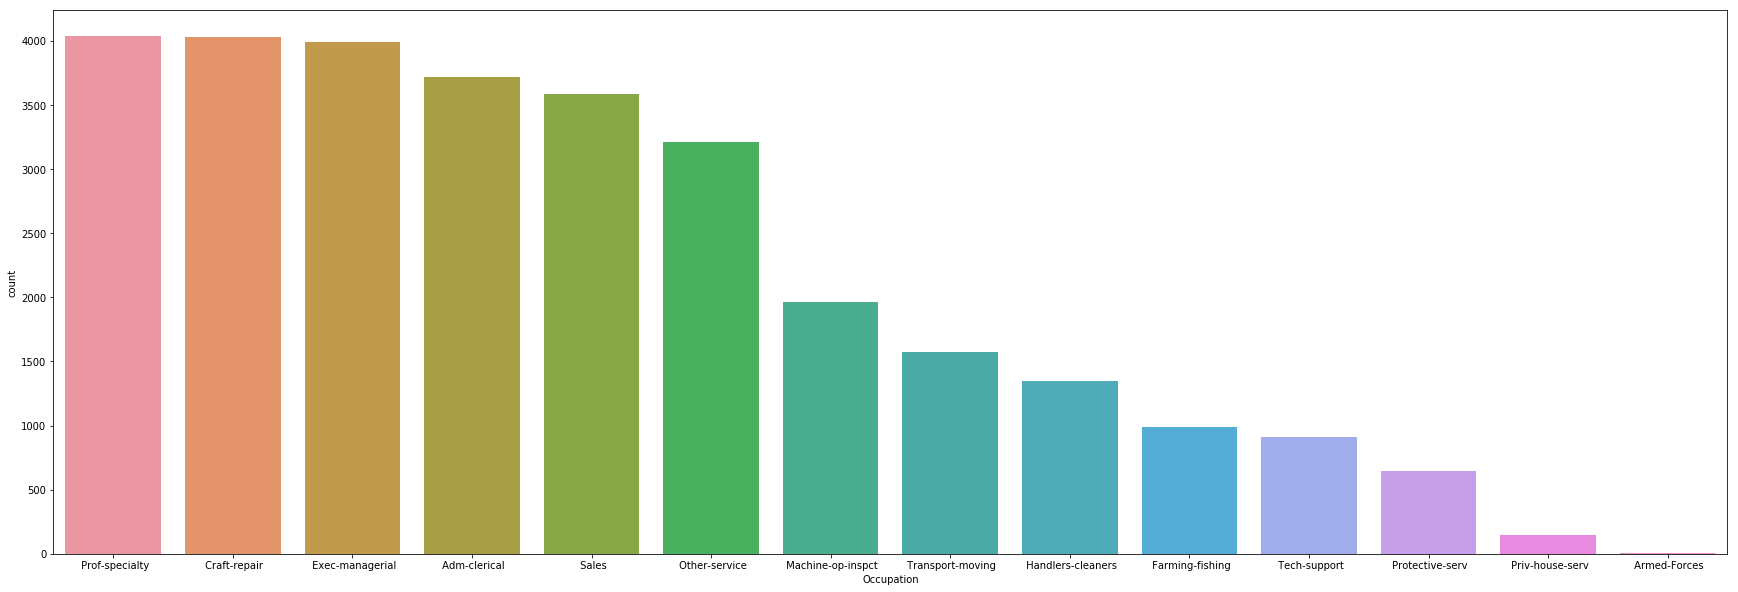

In [12]:
#Occupation
result = df.groupby(["Occupation"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(df['Occupation'],order=result['Occupation'])

## Race

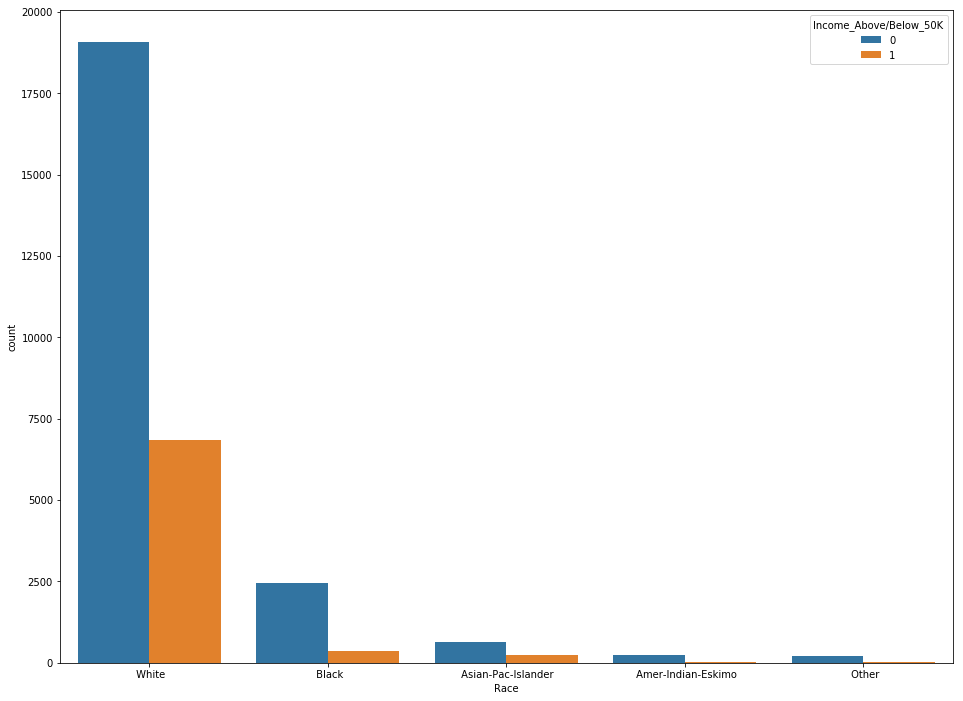

In [13]:
plt.figure(figsize = (16, 12))
sns.countplot(x = 'Race', hue = 'Income_Above/Below_50K', data = df)

## Employer_Type

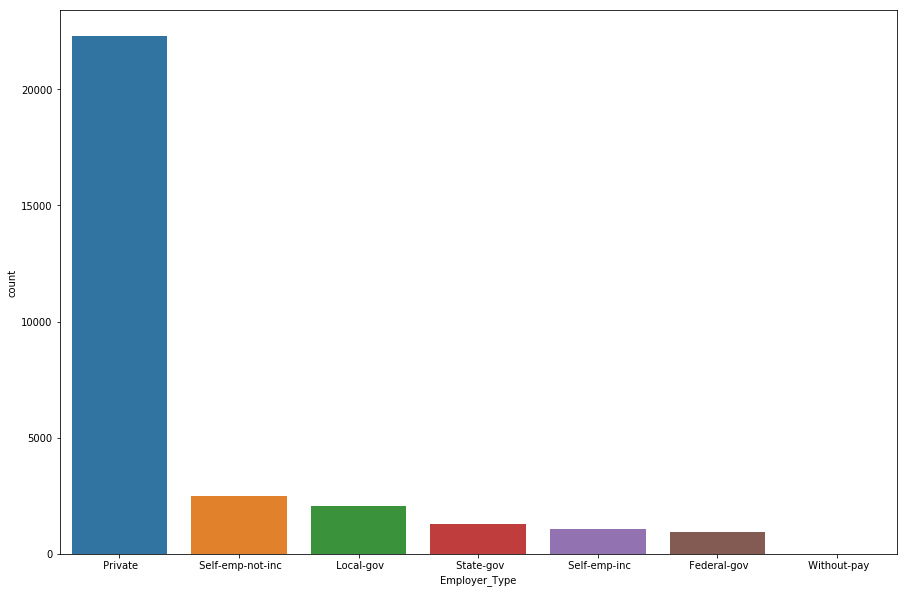

In [14]:
result = df.groupby(["Employer_Type"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(df['Employer_Type'],order=result['Employer_Type'])

## Education

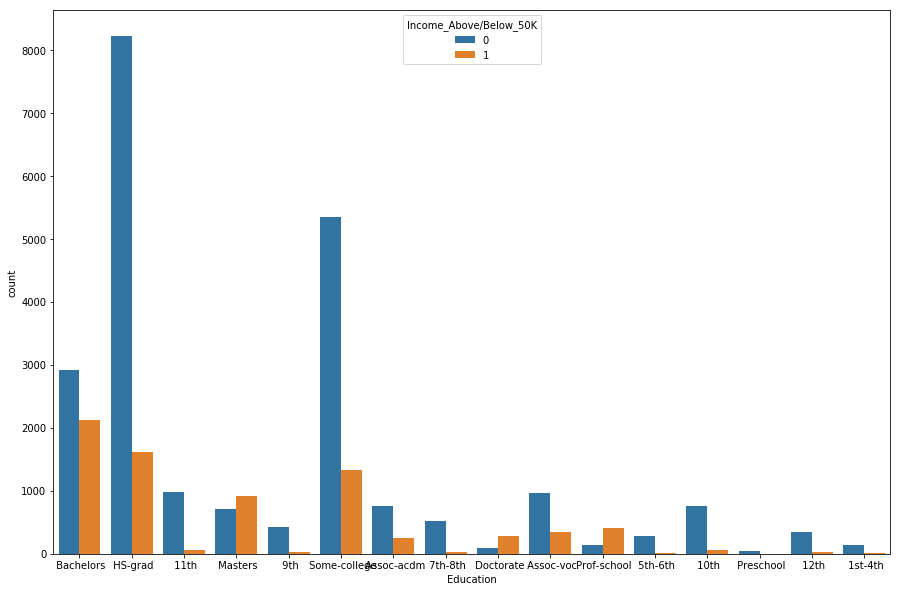

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = 'Education', hue = 'Income_Above/Below_50K', data = df)

## Sex

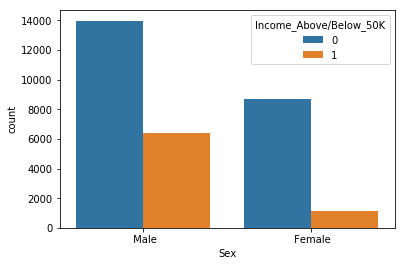

In [16]:

sns.countplot(x = 'Sex', hue = 'Income_Above/Below_50K', data = df)

# Encoding Categorical Variables

In [52]:
# Re-cast categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Employer_Type',
                                 'Education',
                                 'Marital_Status',
                                 'Occupation',
                                 'Relationship',
                                 'Race',
                                 'Sex'])
df.head()

,Age,Hours_per_Week,Income_Above/Below_50K,Employer_Type_0,Employer_Type_1,Employer_Type_2,Employer_Type_3,Employer_Type_4,Employer_Type_5,Employer_Type_6,...,Relationship_3,Relationship_4,Relationship_5,Race_0,Race_1,Race_2,Race_3,Race_4,Sex_0,Sex_1
0,39,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Train and Test Data

In [53]:
#from sklearn.Cross_validation import train_test_split
y = df['Income_Above/Below_50K']
X = df.drop(['Income_Above/Below_50K'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Total features: 59


# Applying Machine Learning
The following algorithms are applied:

### Logistic Regression 

### KNN

### Desission Tree

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions= logmodel.predict(X_test)

In [55]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6764
           1       0.70      0.56      0.62      2285

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.78      0.74      0.75      9049
weighted avg       0.82      0.83      0.82      9049



[[6203  561]
 [1001 1284]]


Text(48.5, 0.5, 'Actual classes')

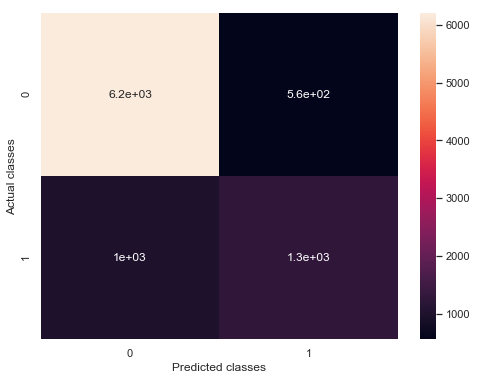

In [56]:
#confusion_matrix

from sklearn.metrics import confusion_matrix
#Plotting the confusion matrix
sns.set(rc={'figure.figsize':(8,6)})
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, annot=True)
print(cfm)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')


Interpretation

Y-axis represents the actual classes
X-axis represents the predicted classes
11620 times when the model correctly predicted 0 when the actual class was 0 (True Negatives)
1587 times the model predicted 0 when the actual class was 1 (False Negatives)
815 times the model predicted 1 when the actual class was 0 (False Positives)
2259 times the model correctly predicted 1 when the actual class was 1 (True Positives)

In [57]:
#accuracy_score
from sklearn.metrics import accuracy_score

print('Logistic Regression accuracy score is: {0:0.4f}'. format(accuracy_score(y_test,predictions )))

Logistic Regression accuracy score is: 0.8274


# KNN Algorithm

In [58]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 0.964/0.764
k: 3, Train/Test Score: 0.882/0.788
k: 5, Train/Test Score: 0.860/0.798
k: 7, Train/Test Score: 0.850/0.800
k: 9, Train/Test Score: 0.843/0.801
k: 11, Train/Test Score: 0.839/0.805
k: 13, Train/Test Score: 0.834/0.806
k: 15, Train/Test Score: 0.833/0.807
k: 17, Train/Test Score: 0.832/0.803
k: 19, Train/Test Score: 0.829/0.807


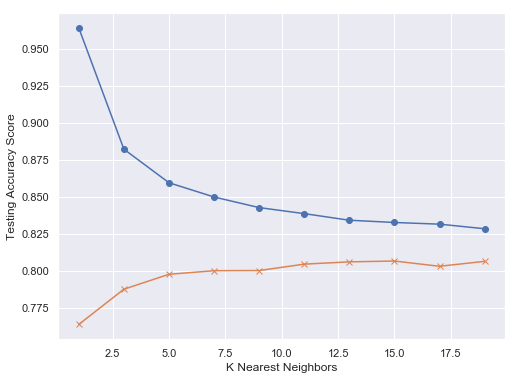

In [59]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
   
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [60]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.798


# Decision Tree Model

In [27]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Structure path for GraphViz
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Austr\\Anaconda3\\envs\\PythonSMU\\Library\\bin\\graphviz'

In [28]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6813
           1       0.57      0.66      0.61      2236

   micro avg       0.79      0.79      0.79      9049
   macro avg       0.73      0.75      0.74      9049
weighted avg       0.81      0.79      0.80      9049



In [30]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

features = list(df.columns[1:])

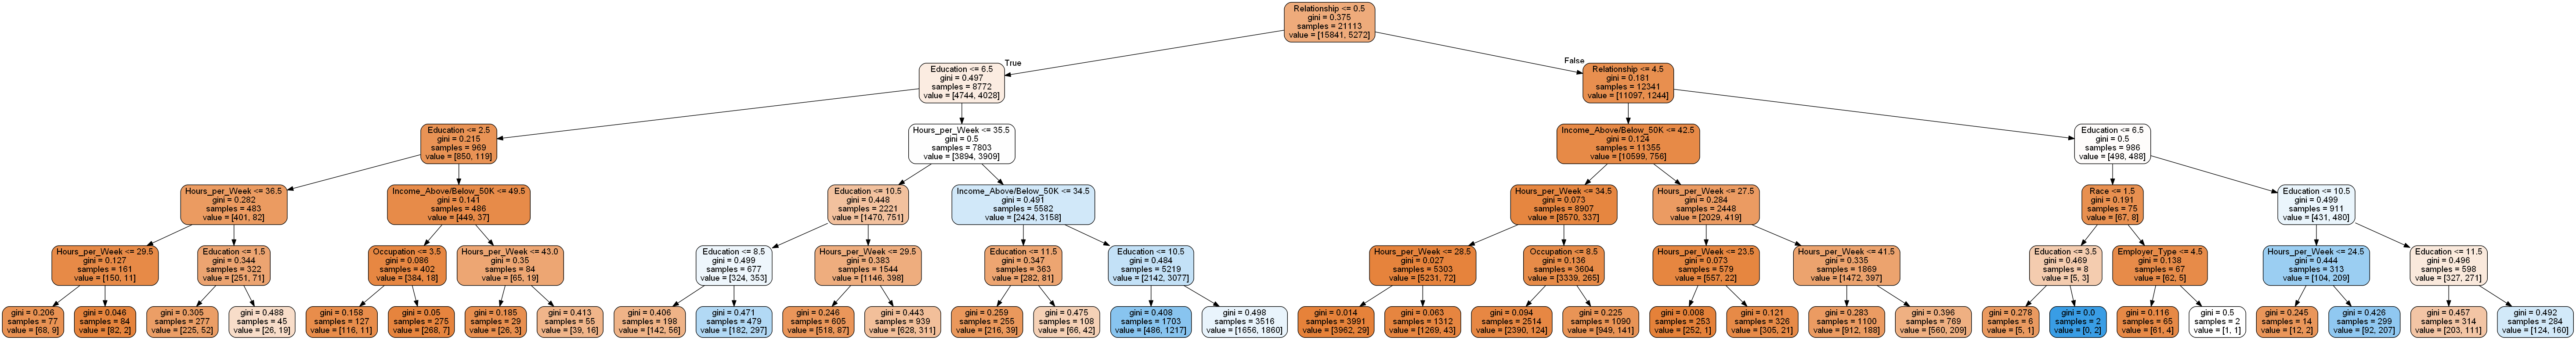

In [31]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 0)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [33]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010992,1.632194e-03,0.002667,0.000471,1,{'max_depth': 1},0.750249,0.750320,0.750320,0.750296,0.000034,18,0.750320,0.750284,0.750284,0.750296,0.000017
1,0.012993,1.633167e-03,0.002998,0.000002,2,{'max_depth': 2},0.747549,0.743072,0.748472,0.746365,0.002358,19,0.752736,0.753197,0.752273,0.752735,0.000377
2,0.010992,8.161461e-04,0.001333,0.000471,3,{'max_depth': 3},0.783776,0.786415,0.786557,0.785582,0.001279,16,0.784354,0.787298,0.787795,0.786482,0.001518
3,0.010993,1.946680e-07,0.001667,0.000471,4,{'max_depth': 4},0.786049,0.799488,0.791104,0.792213,0.005542,13,0.790891,0.800583,0.790210,0.793895,0.004737
4,0.012985,9.330533e-06,0.001666,0.000470,5,{'max_depth': 5},0.816451,0.803183,0.816399,0.812012,0.006242,7,0.817678,0.804845,0.821185,0.814569,0.007024


In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 0)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 0)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [37]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8279732866006726
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [38]:
# model with optimal hyperparameters
clf = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 1,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [39]:
# accuracy score
clf.score(X_test,y_test)

0.7936788595424908

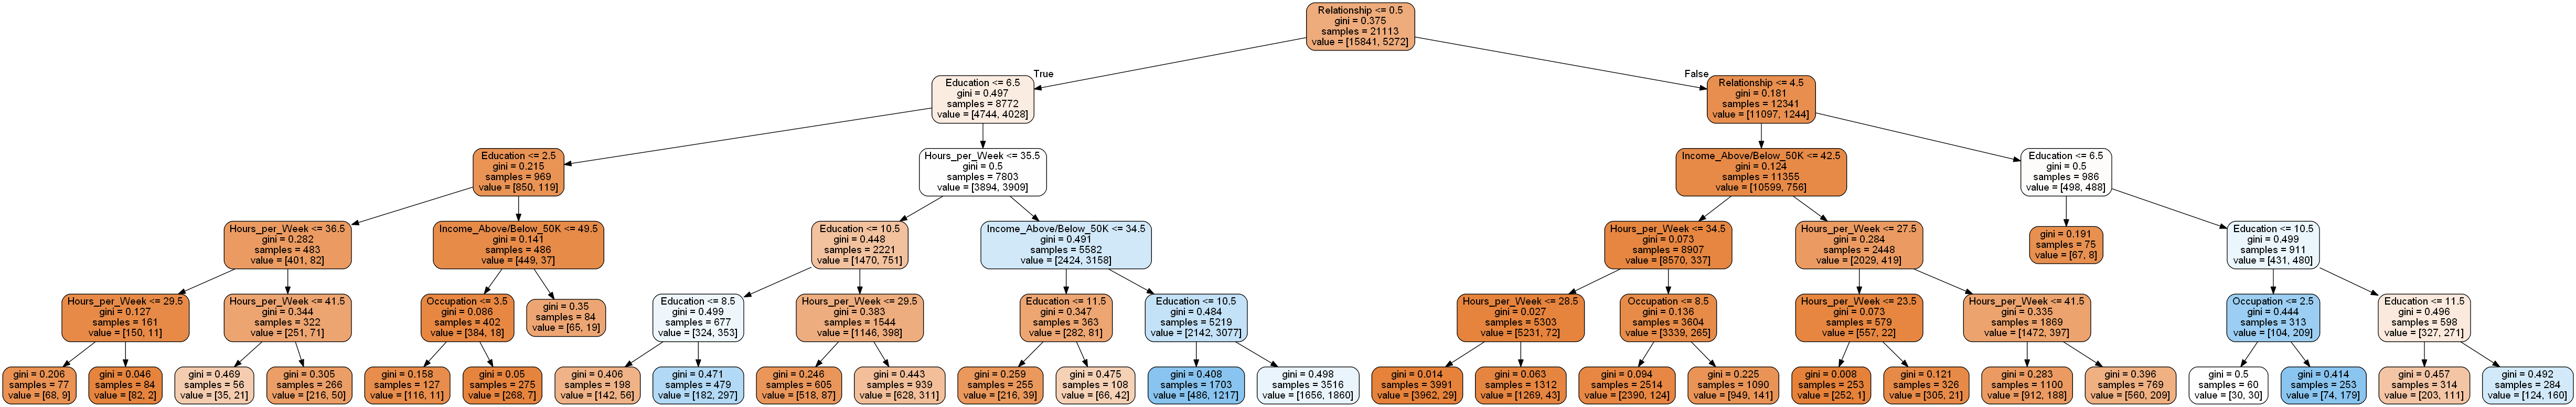

In [40]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6813
           1       0.57      0.66      0.61      2236

   micro avg       0.79      0.79      0.79      9049
   macro avg       0.73      0.75      0.74      9049
weighted avg       0.80      0.79      0.80      9049



# Comparission/Analysisng Results

In [42]:
classifiers = [DecisionTreeClassifier(),LogisticRegression(),
               KNeighborsClassifier()]
classifier_names = ["Decision Tree Classifier", 
                    "LogisticRegression", 
                    "KNeighborsClassifier"]
accuracies = []

In [43]:
from sklearn.metrics import f1_score, accuracy_score

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Decision Tree Classifier:
F1 score: 0.52
LogisticRegression:
F1 score: 0.29
KNeighborsClassifier:
F1 score: 0.55


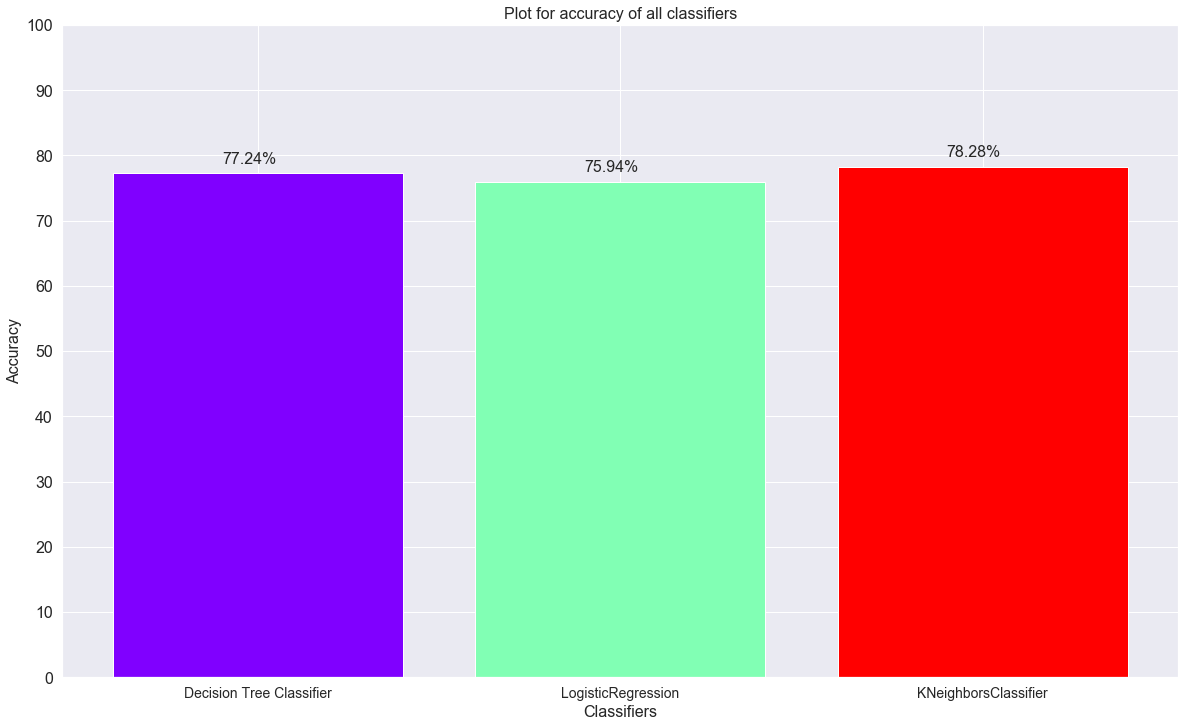

In [44]:

from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)